<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/i_pg23_hafta10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PANDAS İLE VERİ TABLOLARININ**
- ## **SAYISALLAŞTIRILMASI,**
- ## **BETİMSEL İSTATİSTİKLERİNİN ELDE EDİLMESİ,**
- ## **EKSİK VERİ YÖNETİMİ**

<br><br> Bu deste [kaggle.com](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers) üzerinden elde edilen bir veri kümesi üzerinde çalışacağız.<br><br>
Veri kümesi, üç ayrı ülkeden banka müşterilerinin marka değişikliği tercihini (başka bir banka ile çalışmak üzere verinin ait olduğu banka olan ilişkilerini sonlandırması) incelemek üzere derlenmiş 10.ooo müşteriye ait kayıtları içermektedir.<br><br>
[Veriye ulaşmak için tıklayınız.](https://docs.google.com/spreadsheets/d/1mI0AXQWc8vwm0fwLtpSaMSRSHhWd_dJ7/edit?usp=sharing&ouid=118070736600138175370&rtpof=true&sd=true)<br><br>
Bu bağlantı Microsoft Office'e sahip olmayabileceğiniz öngörülerek Google E-tablolar üzerinden açılacaktır. Açılan e-tablolar penceresinde
- **Dosya** / **İndir** / **Microsoft Excel (.xlsx)**

komutlarını uygulayarak dosyayı kullanmakta olduğunuz cihazın kalıcı hafızasına indiriniz.
<br><br>
Artık bu dosyayı Colab Oturum Belleğine yükleyebilir ve bu dosyayı bir pandas veri tablosu olarak oturuma çağırabilirsiniz.<br><br><br>

In [58]:
#  Önce Bazı Kütüphaneleri Çağıralım

#    Bunlar hesaplamalar ve veri düzenlemelerine ilişkin kütüphaneler
import numpy as np
import pandas as pd

#    Bunlar da veri görselleştirmelere ilişkin kütüphaneler (ileriki derslerde bu kütüphaneleri daha iyi tanıyacağız)
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#  data.xlsx dosyasını bir veri tablosu olarak çağırıyorum

df = None
df = pd.read_excel( '/content/data.xlsx' )
df

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<br><br>
**Veri tablosunun indis etiketleriyle "RowNumber" sütununun aynı olduğunu farkettiniz mi**<br><br>
Öyleyse indis etiketlerimiz ilk sütundaymış...
<br><br><br>

In [60]:
df = pd.read_excel( '/content/data.xlsx', index_col = 0 )
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<br><br>
Şimdi tabloyu daha iyi görebiliyoruz...
<br><br>
Hadi sütun başlıklarını yeniden düzenleyelim.
<br><br><br>

In [61]:
#  Veri tablosunun sütunlarını bir gruplayıcı olarak inceleyelim
list( df.columns )

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

<br><br>
Şimdi bir üst kod hücresinin kod çıktısı olarak ürettiğimiz sütun etiketleri listesini kopyalayıp alt kod hücresine yapıştıralım ve sırasıyla;
- ***'CreditScore'*** yerine ***'KrediSkoru'***,
- ***'Geography'*** yerine ***'Ülke'***,
- ***'Gender'*** yerine ***'Cinsiyet'***,
- ***'Age'*** yerine ***'Yaş'***,
- ***'Tenure'*** yerine ***'Süre'***,
- ***'Balance'*** yerine ***'Bakiye'***,
- ***'NumOfProducts'*** yerine ***'ÜrünSayısı'***,
- ***'HasCrCard'*** yerine ***'KrediKartı'***,
- ***'IsActiveMember'*** yerine ***'Aktif'***,
- ***'EstimatedSalary'*** yerine ***'Gelir'***,
- ***'Exited'*** yerine ***'Terk'***

yazalım
<br><br><br>

In [62]:
['KrediSkoru',
 'Ülke',
 'Cinsiyet',
 'Yaş',
 'Süre',
 'Bakiye',
 'ÜrünSayısı',
 'KrediKartı',
 'Aktif',
 'Gelir',
 'Terk']

['KrediSkoru',
 'Ülke',
 'Cinsiyet',
 'Yaş',
 'Süre',
 'Bakiye',
 'ÜrünSayısı',
 'KrediKartı',
 'Aktif',
 'Gelir',
 'Terk']

<br><br>
Şimdi de bu yeni listeyi veri tablomuzun sütun etiketleri olarak atayalım.
<br><br><br>

In [63]:
df.columns = ['KrediSkoru',
 'Ülke',
 'Cinsiyet',
 'Yaş',
 'Süre',
 'Bakiye',
 'ÜrünSayısı',
 'KrediKartı',
 'Aktif',
 'Gelir',
 'Terk']
 
df

,KrediSkoru,Ülke,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<br><br>
**11 sütunumuz var.**
- ***Cinsiyet***,
- ***Ülke***

sütunlarında sayısal veri yerine sözel veri olduğunu farkettiniz mi?
<br><br>
Bu sözel veriyi sayısallaştırmak için bu veriyi kukla değişkenlere dönüştüreceğiz.
<br><br>
**Kukla Değişkenler**, sözel veriyi 0 ya da 1 verisi ile değiştirmek demektir.
- Örneğin ***Cinsiyet*** verisi; erkek için 1 ve kadın için 0 ile değiştirilebilirç
- Örneğin ***Ülke*** verisi; herbir farklı ülke için, müşteri o ülkedense 1 değilse 0 verisi ile değiştirilerek farklı ülke sayısında sütuna dağıtılabilir.
<br><br><br>

In [64]:
#  Cinsiyet verisinin kukla değişkene dönüştürülmesi

#    ADIM 1: "Cinsiyet verisi 'Male'dir." önermesinin herbir satırda doğruluk yanlışlık değerlerini inceleyelim
df.Cinsiyet == 'Male'

RowNumber
1        False
2        False
3        False
4        False
5        False
         ...  
9996      True
9997      True
9998     False
9999      True
10000    False
Name: Cinsiyet, Length: 10000, dtype: bool

In [65]:
#      Bool değerlerinden 'True' sayısal olarak 1'e ve 'False' ise 0'a denktir.
#    ADIM 2: Bu önermedeki değerleri bir numpy dizisine dönüştürüp 0 değerine ekleyelim.
0 + np.array( df.Cinsiyet == 'Male' )

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
#    ADIM 3: Artık bu yeni sayı dizisini Cinsiyet sütüunundaki sözel veri ile değiştirebiliriz:
df['Cinsiyet'] = 0 + np.array( df.Cinsiyet == 'Male' )
df

,KrediSkoru,Ülke,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk
RowNumber,,,,,,,,,,,
1,619,France,0,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
3,502,France,0,42,8,159660.80,3,1,0,113931.57,1
4,699,France,0,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,1,39,5,0.00,2,1,0,96270.64,0
9997,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,0,36,7,0.00,1,0,1,42085.58,1


In [67]:
#  Ülke verisinin kukla değişkene dönüştürülmesi
#    ADIM 1: Ülke verisinde birbirinden farklı kaç değer olduğuna bakalım:
#      ilgili sütunda .unique() metodunu uyguladığımızda farklı değerlerin bir gruplayıcısını elde ederiz.
#      len() fonksiyonu ise gruplayıcıların üye sayısını verecektir.
len( df.Ülke.unique() )

3

In [68]:
#    ADIM 2: Ülke verisindeki birbirinden farklı değerleri görelim
list( df.Ülke.unique() )

['France', 'Spain', 'Germany']

In [69]:
#      Fransa, İspanya ve Almanya kukla değişkenleri için birer sütun oluşturacağız...

#    ADIM 3: Herbir ülke için kukla değişkenlerin oluşturulması
#      Fransa için; Fransa kukla değişkenimiz 0'a "Ülke verisi Fransa'dır." önermesinin numpy dizisinin eklenmesi ile elde edilir.
df['Fransa'] = 0 + np.array( df.Ülke == 'France' )
#      İspanya için; İspanya kukla değişkenimiz 0'a "Ülke verisi İspanya'dır." önermesinin numpy dizisinin eklenmesi ile elde edilir.
df['İspanya'] = 0 + np.array( df.Ülke == 'Spain' )
#      Almanya için; Almanya kukla değişkenimiz 0'a "Ülke verisi Almanya'dır." önermesinin numpy dizisinin eklenmesi ile elde edilir.
df['Almanya'] = 0 + np.array( df.Ülke == 'Germany' )
df

,KrediSkoru,Ülke,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk,Fransa,İspanya,Almanya
RowNumber,,,,,,,,,,,,,,
1,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9997,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9998,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0


In [70]:
#      Veri tablomuzun sonuna yeni üç sütun ekledik.
#      Peki, artık Ülke sütununa ihtiyacımız kaldı mı?

#    ADIM 4: Ülke sütununu silelim
df = df.drop( ['Ülke',] , axis = 1 )
df

,KrediSkoru,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk,Fransa,İspanya,Almanya
RowNumber,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9997,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9998,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0


<br><br>
**Artık sözel veri içermeyen, tamamen sayısal veri içeren bir veri kümemiz var.**
<br><br>
Artık tablomuzun betimsel istatistiklerini inceleyebiliriz:
bunun için ***.describe()*** metodunu kullanacağız.
<br><br><br>

In [71]:
#  Veri tablomuzun betimsel istatistiklerini inceliyoruz.
df.describe()

,KrediSkoru,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk,Fransa,İspanya,Almanya
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.247700,0.250900
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.431698,0.433553
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [72]:
#  Özellikle çok sayıda sütunu olan veri tabloları için elde edeceğimiz tablonun transpozunu almak daha kullanışlı olabilir:
#    bunun için .T metodunu uygulayacağız.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KrediSkoru,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Cinsiyet,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Yaş,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Süre,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Bakiye,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
ÜrünSayısı,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
KrediKartı,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Aktif,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Gelir,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Terk,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


<br><br>
- ***df.describe().T***

Kod parçası çalıştırıldığında satırlarda yer alan herbir veri kategorisi için;
- **count:** Kaç veri olduğunu,
- **mean:** Verinin ortalama değeri,
- **std:** Verinin standart sapması,
- **min:** Verinin en küçük değeri,
- **25%:** İlk kartildeki en büyük veri değeri,
- **50%:** İkinci kartildeki en büyük veri değeri (medyan/ortanca),
- **75%:** Üçüncü kartildeki en büyük veri değeri,
- **max:** Verinin en büyük değeri

bilgilerini verir.
<br><br>
**Önemli İpucu 1.** En küçük değer için;<br>
# $\bar{x}-x_{min} \over \sigma$
(minimum değer ile ortalamanın farkı kaç standart sapma cinsinden ölçülebilir?)
<br>
hesaplandığında değer 3'ün çok üzerindeyse uç değerler (outlier) vardır.<br><br>
**Önemli İpucu 2.** En büyük değer için;<br>
# $x_{max}-\bar{x} \over \sigma$
(maksimum değer ile ortalamanın farkı kaç standart sapma cinsinden ölçülebilir?)
<br>
hesaplandığında değer 3'ün çok üzerindeyse uç değerler (outlier) vardır.
<br><br><br>

In [73]:
#  Sol kuyrukta (küçük değerlerde) uç değer var mı?
(df.describe().T['mean'] - df.describe().T['min']) / df.describe().T['std']

KrediSkoru    3.109349
Cinsiyet      1.095933
Yaş           1.994869
Süre          1.733229
Bakiye        1.225786
ÜrünSayısı    0.911538
KrediKartı    1.547691
Aktif         1.030619
Gelir         1.740181
Terk          0.505749
Fransa        1.002754
İspanya       0.573780
Almanya       0.578707
dtype: float64

In [74]:
#  Sağ kuyrukta (küçük değerlerde) uç değer var mı?
(df.describe().T['max'] - df.describe().T['mean']) / df.describe().T['std']

KrediSkoru    2.063781
Cinsiyet      0.912374
Yaş           5.060944
Süre          1.724377
Bakiye        2.795184
ÜrünSayısı    4.246164
KrediKartı    0.646059
Aktif         0.970194
Gelir         1.737113
Terk          1.977066
Fransa        0.997154
İspanya       1.742653
Almanya       1.727817
dtype: float64

<br><br>
**Yaş verisinde en büyük değerin uç değer olabileceğini düşünebiliriz.**
<br><br>
Acaba Yaş verisinin ortalama değeri ile medyan değeri çok mu farklı?
<br><br><br>

In [75]:
#  Sırasıyla ortalama ve ortanca (medyan) değerlerini görelim
df.describe().T['mean']['Yaş'] , df.describe().T['50%']['Yaş']

(38.9218, 37.0)

<br><br>
**Bazen uç değerlerin varlığında; ortalama, uç değerlerden ciddi biçimde etkilenebilir. Bu durumda ortalama yerine ortancayı (medyanı) kullanmak düşüncesi değerlendirilebilir.**
<br><br>
Bu örnekte Yaş verisi için ortalama - ortanca arasındaki fark çok dramatik değil.
<br><br>
Acaba veri kümemiz içerisindeki farklı veri kategorileri arasındaki ilişkiyi "bir bakışta" görebilir miyiz?
<br><br>
Bunun için seaborn kütüphanesinin pairplot() fonksiyonunu kullanacağız.
<br><br>
- ***sns.pairplot( df )***

Bu fonksiyonunun bir kod çıktısı üretmesi biraz uzun sürebilir...
<br><br><br>

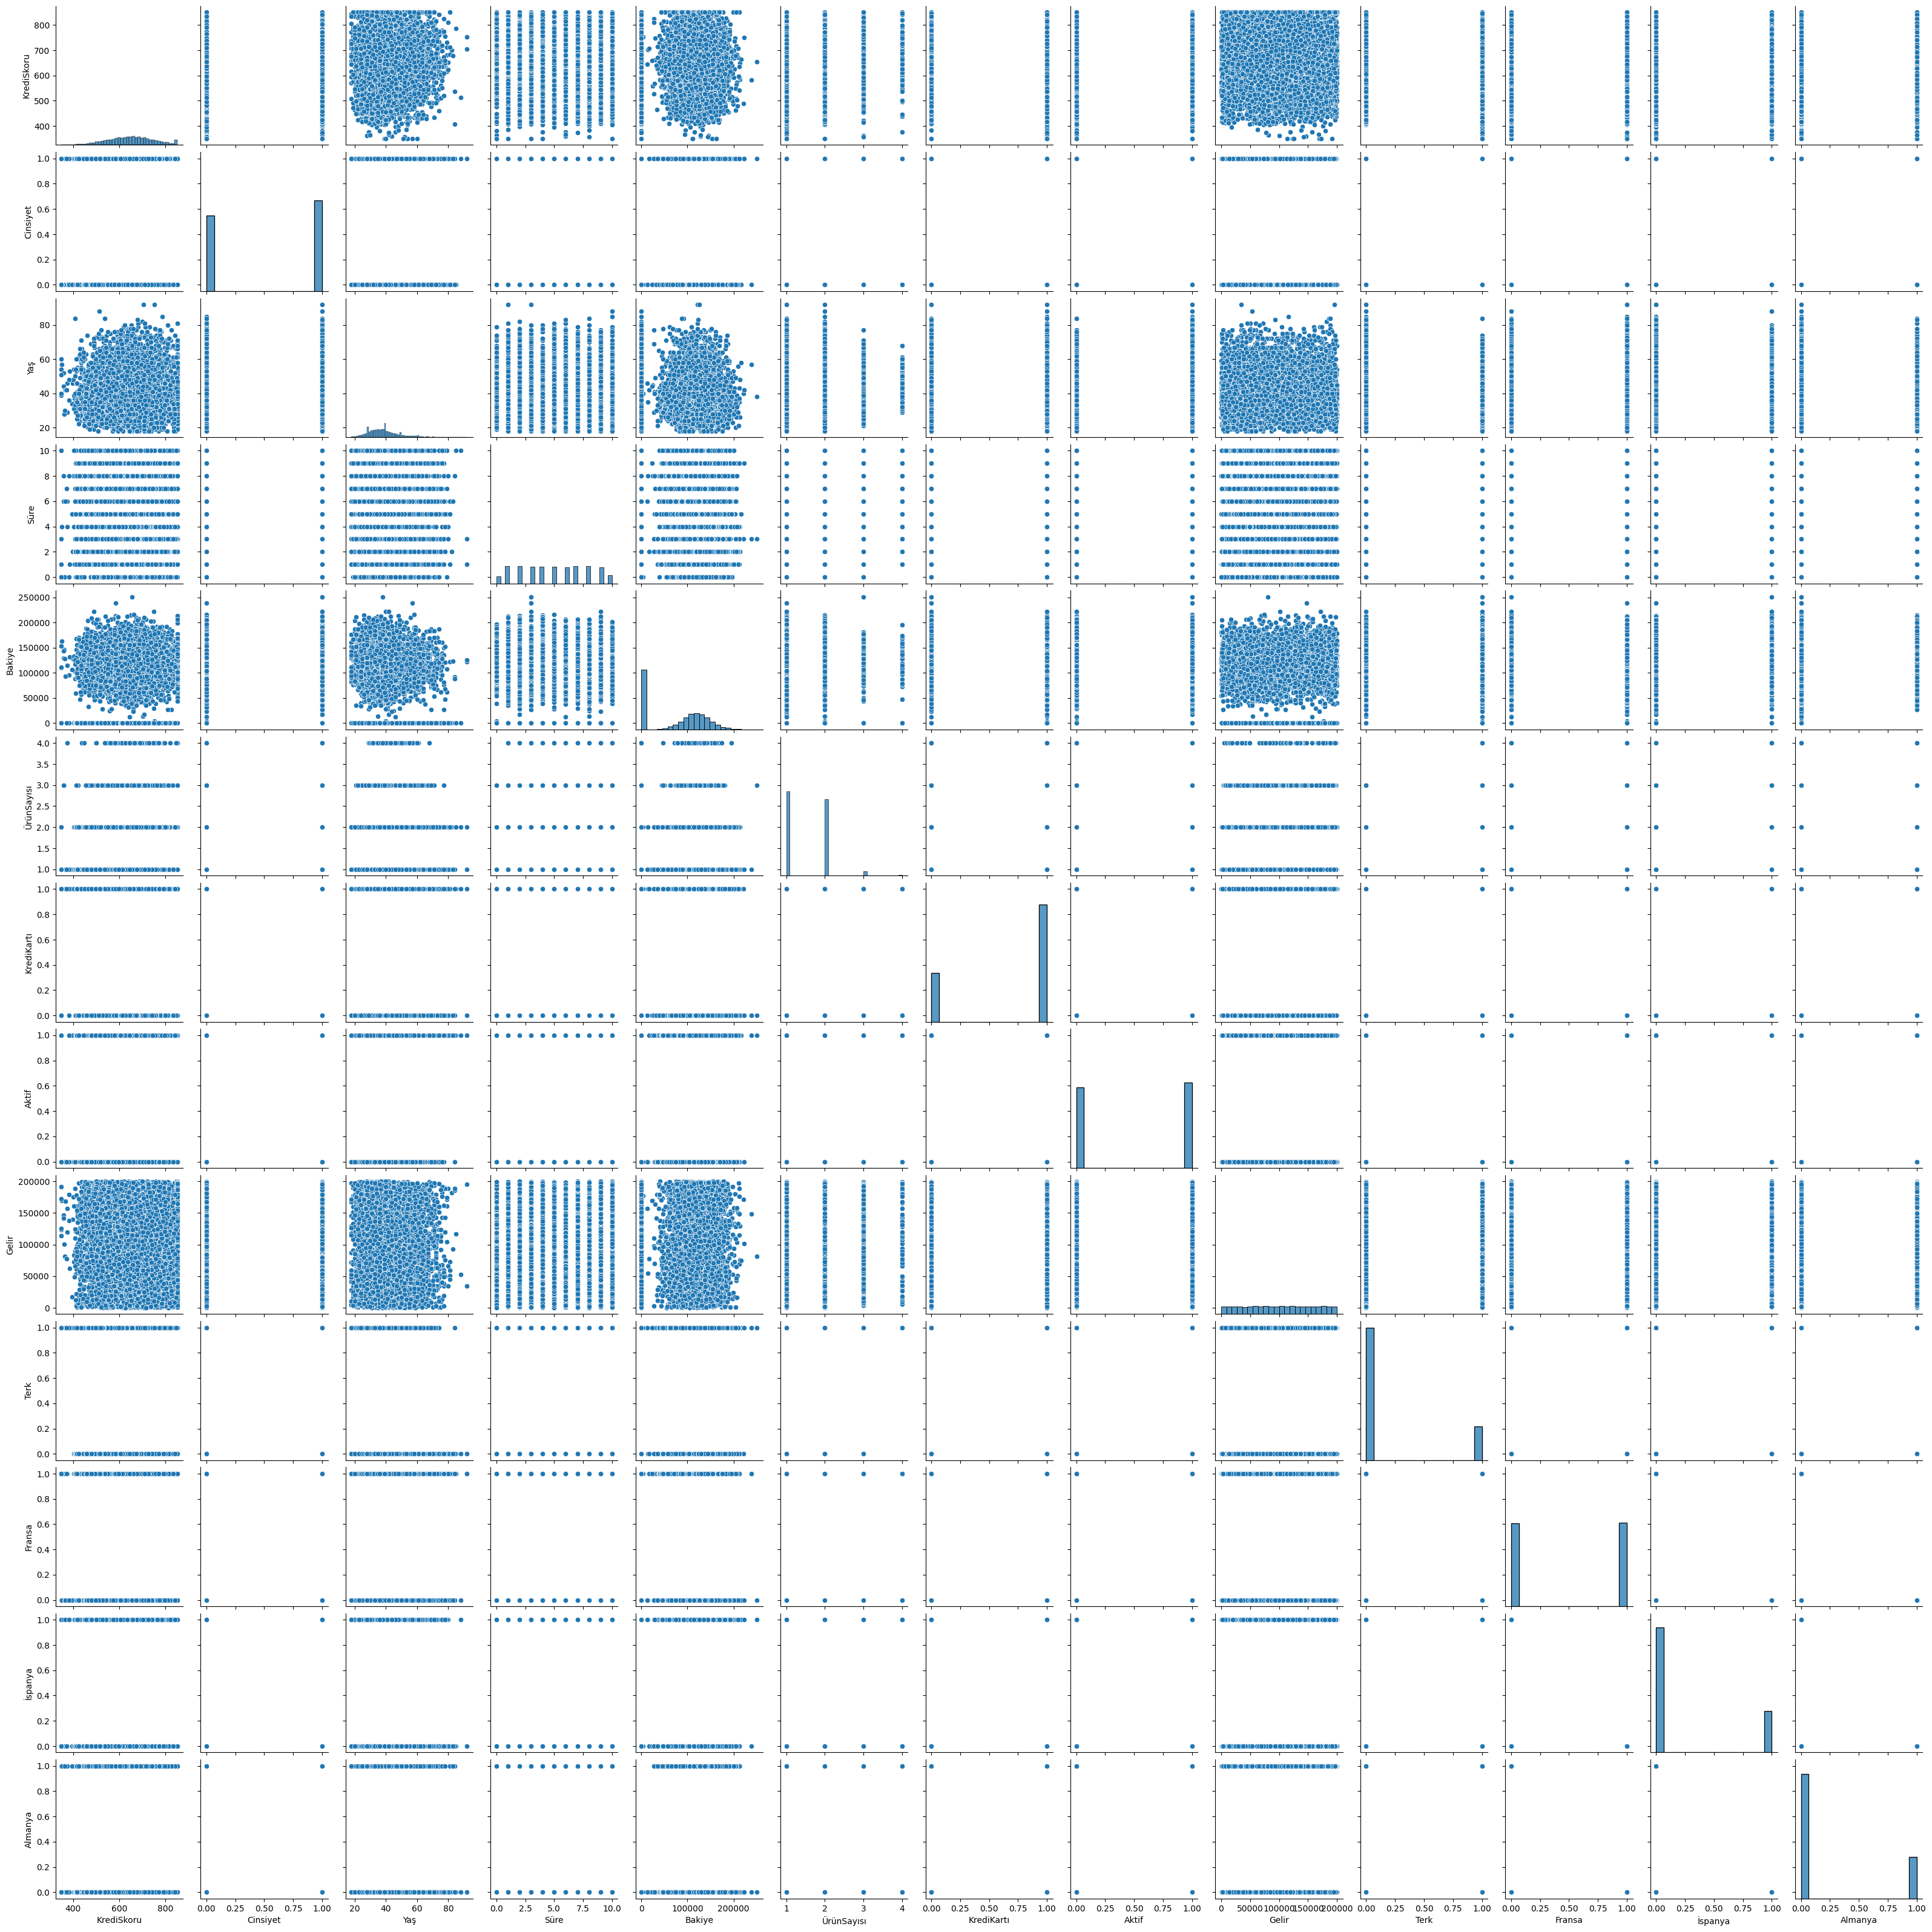

In [76]:
#  Veriler arasında ilişki var mı? Görsel inceleme
sns.pairplot(df)

<br><br>
Bazen bu ikili karşılaştırma grafikleri, veriler arasındaki;
- doğrusal ilişkileri,
- doğrusal olmayan ilişkileri

ortaya koyabilir.<br><br>
Bu ilişkiyi **özellikle** kukla değişkenler için görmek daha zor olabilir.<br><br>
Veriler arasında doğrusal olmayan ilişkileri de tespit edebilen "***Spearman Sıra Korelasyonu***" ile de inceleyebiliriz.<br><br>
Bunun için;
<br><br>
- ***scipy.stats.spearmanr()*** fonksiyonunu kullanacağız.
<br><br><br>

In [77]:
#  Veriler arasında ilişki için Spearman Sıra Korelasyonuna bakalım
#    scipy.stats.spearmanr()

# !pip install scipy
from scipy import stats

src = stats.spearmanr( df.Bakiye, df.KrediSkoru )
src

SignificanceResult(statistic=0.005686570567648805, pvalue=0.5696340276861511)

<br><br>
Elde ettiğimiz kod çıktısı bir gruplayıcıdır. Bu gruplayıcının;
- ilk üyesi korelasyon katsayısı,
- İkinci üyesi ise bu istatistiğin p-değeridir.
<br><br>

Korelasyon katsayısı [-1,1] aralığında değerler alabilir.
- -1'e yakın değerler güçlü negatif ilişkiye işaret eder,
- 1'e yakın değerler güçlü pozitif ilişkiye işaret eder,
- 0'a yakın değerler ise ilişkisizliğe işaret eder.

<br><br>
***p*** **- değeri** ise 0.05 veya daha yüksek değerleri için bulunan korelasyon katsayısı istatistiğinin anlamlı olmadığı bilgisini bize verir.
<br><br><br>

In [78]:
#  Tüm veri kategorileri ikilileri için korelasyon bilgisine bakalım

for i in df.columns:
  for j in df.columns:
    src = stats.spearmanr( df[i], df[j] )
    
    #  bulunan istatistik yalnızca anlamlı ise...
    if src[1] < .05:
      print( i,'-',j,'-->',src[0] )

KrediSkoru - KrediSkoru --> 1.0
KrediSkoru - Aktif --> 0.024262340713124095
KrediSkoru - Terk --> -0.023289396606662873
Cinsiyet - Cinsiyet --> 1.0
Cinsiyet - Yaş --> -0.029784819365521027
Cinsiyet - Aktif --> 0.022544324652307986
Cinsiyet - Terk --> -0.10651248767347463
Cinsiyet - Almanya --> -0.024627879392114676
Yaş - Cinsiyet --> -0.02978481936552103
Yaş - Yaş --> 1.0
Yaş - Bakiye --> 0.033304343569281254
Yaş - ÜrünSayısı --> -0.05856646194971068
Yaş - Aktif --> 0.039839173438010064
Yaş - Terk --> 0.3239679123547138
Yaş - Fransa --> -0.04939581900655386
Yaş - Almanya --> 0.05623380081814304
Süre - Süre --> 0.9999999999999999
Süre - KrediKartı --> 0.022354093855651767
Süre - Aktif --> -0.028673286055596426
Bakiye - Yaş --> 0.033304343569281254
Bakiye - Bakiye --> 1.0
Bakiye - ÜrünSayısı --> -0.316626558113274
Bakiye - Terk --> 0.11111019347533499
Bakiye - Fransa --> -0.2127948116785735
Bakiye - İspanya --> -0.12686787689879658
Bakiye - Almanya --> 0.3717447178921899
ÜrünSayısı - Yaş

<br><br>
**Pozitif ya da negatif korelasyon, farklı veri kategorileri için çok güçlü ise analizlerimizde bu veri kategorilerini beraber kullanmaktan çekinilmelidir.**
<br><br>
Bu veri kümesinde böyle bir durum gözlemlemedik.
<br><br>
##  **Eksik Veri Yönetim Stratejileri**
- **Kritik veri kategorileri için eksik veriyi içeren satırları veri kümesinden çıkarmak iyi bir fikir olabilir.**
- **Veri kaybı kritikse eksik veriyi yamamak iyi bir fikir olabilir**
 - **1.** Eksik veri yerine ortalama değeri yaz (uç değer olup olmadığını kontrol ettiniz mi?),
 - **2.** Eksik veri yerine ortanca (medyan) değeri yaz, 
 - **3.** Eksik veri yerine mod değeri yaz,
 - **4.** Eksik veri yerine tahmini değeri yaz.

<br>
Bu konuda uzun uzun konuşacağız...
<br><br>
Şimdilik sadece eksik veri nasıl bulunur onu görelim.
<br><br><br>

In [79]:
#  .isnull() metodu veri tablosunda herbir veri hücresi için eksik veri var ise True, yok ise False değerli yeni bir veri tablosu oluşturur.

df.isnull()

,KrediSkoru,Cinsiyet,Yaş,Süre,Bakiye,ÜrünSayısı,KrediKartı,Aktif,Gelir,Terk,Fransa,İspanya,Almanya
RowNumber,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
#  Örnek bir sütun özelinde .isnull() metodunu görelim

df.Yaş.isnull()

RowNumber
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Name: Yaş, Length: 10000, dtype: bool

In [81]:
#  Örnek bir sütun özelinde "Kaç boş değer var?"

df.KrediSkoru.isnull().sum()

0

In [82]:
#  Varsayalım ki son satırda eksik veriler var...

#    ilk sütun için

df.iloc[ -1 , 0 ]  # eksik olduğuny hayal ettiğimiz değer baktık

792

In [83]:
#  ilk sütun ne verisiydi?
df.columns[0]

'KrediSkoru'

In [84]:
#  Acaba medyan değer nedir?
df.KrediSkoru.median()

652.0

In [85]:
#  Acaba ortalama değer nedir?
df.KrediSkoru.mean()

650.5288

In [86]:
#  Acaba mod değer ne?
df.KrediSkoru.mode()

0    850
Name: KrediSkoru, dtype: int64

In [87]:
#  Bu sütunun betimsel istatistikleri neydi?
df.KrediSkoru.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: KrediSkoru, dtype: float64

<br><br>
**Sürekli değişken niteliğindeki "KrediSkoru" verisi için sizce ideal yamama stratejisi ne olabilir, nedeni ile beraber düşününüz.**
<br><br>
Peki, ikili değerler içeren kukla değişkenler için ne yapılabilir?
<br><br>
Örneğin Ülke bilgisi eksikse ne yapmalıyız?
<br><br><br>

In [88]:
#  Fransalı mı verisi eksik

df['Fransa'][ len(df) ]

1

In [89]:
#  Verinin ne kadarı Fransa'lı müşterilere ilişkin?
df.Fransa.sum() / len(df)

0.5014

In [90]:
#  Verinin ne kadarı İspanya'lı müşterilere ilişkin?
df.İspanya.sum() / len(df)

0.2477

In [91]:
#  Verinin ne kadarı Almanya'lı müşterilere ilişkin?
df.Almanya.sum() / len(df)

0.2509

<br><br>
**Sizce Ülke verisi eksik olan bir müşteri kaydı için en mantıklı yamama stratejisi ne olurdu?**
<br><br><br>

<Axes: xlabel='Yaş', ylabel='Terk'>

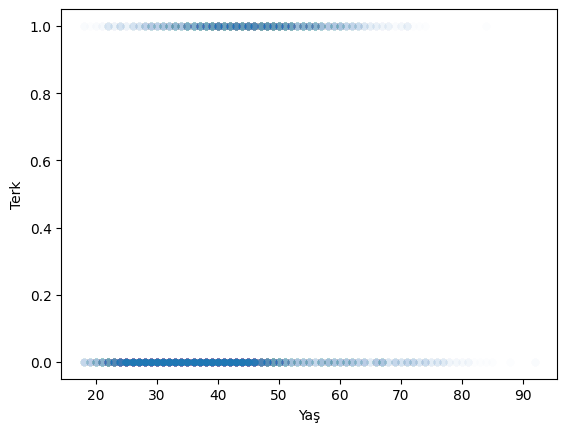

In [92]:
sns.scatterplot( alpha = .01, x= df.Yaş, y=df.Terk )